In [121]:
import pyarrow.feather as feather
import numpy as np
import pandas as pd
import os
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.preprocessing import StandardScaler
from tqdm import tqdm,trange 
from pandas.tseries.offsets import Day, MonthEnd, MonthBegin

In [18]:
pd.options.display.max_columns = 10 # 最大显示列数
pd.options.display.max_rows = 10 # 最大显示行数

## read character data

In [140]:
raw_df=feather.read_feather('/Users/shuxianhong/Desktop/Summer Project/chars60_raw_imputed.feather')

In [141]:
raw_df.columns

Index(['gvkey', 'permno', 'sic', 'ret', 'exchcd', 'shrcd', 'adm', 'bm_ia',
       'herf', 'hire', 'me_ia', 'baspread', 'beta', 'ill', 'maxret', 'mom12m',
       'mom1m', 'mom36m', 'mom60m', 'mom6m', 're', 'rvar_capm', 'rvar_ff3',
       'rvar_mean', 'seas1a', 'std_dolvol', 'std_turn', 'zerotrade', 'me',
       'dy', 'turn', 'dolvol', 'abr', 'sue', 'cinvest', 'nincr', 'pscore',
       'acc', 'bm', 'agr', 'alm', 'ato', 'cash', 'cashdebt', 'cfp', 'chcsho',
       'chpm', 'chtx', 'depr', 'ep', 'gma', 'grltnoa', 'lev', 'lgr', 'ni',
       'noa', 'op', 'pctacc', 'pm', 'rd_sale', 'rdm', 'rna', 'roa', 'roe',
       'rsup', 'sgr', 'sp', 'date', 'ffi49'],
      dtype='object')

In [142]:
raw_tf = raw_df.isnull().any()
raw_tf.where(raw_tf == True).dropna().index.to_list()

['adm',
 'bm_ia',
 'mom12m',
 'mom36m',
 'mom60m',
 'mom6m',
 'seas1a',
 'abr',
 'sue',
 'cinvest',
 'nincr',
 'pscore',
 'acc',
 'bm',
 'agr',
 'alm',
 'ato',
 'cashdebt',
 'chcsho',
 'chpm',
 'chtx',
 'gma',
 'grltnoa',
 'lgr',
 'ni',
 'noa',
 'op',
 'pctacc',
 'rna',
 'roa',
 'roe',
 'rsup',
 'sgr']

In [143]:
raw_df['year'] = raw_df['date'].dt.year
raw_df = raw_df[raw_df['year'] >= 1972]
raw_df = raw_df.drop(['year'], axis=1)

In [144]:
raw_tf = raw_df.isnull().any()
raw_tf.where(raw_tf == True).dropna().index.to_list()

[]

no missing value!

In [145]:
raw_df

,gvkey,permno,sic,ret,exchcd,...,rsup,sgr,sp,date,ffi49
136,1010,10006,3743,0.004854,1.0,...,0.000047,0.042217,0.001158,1972-01-31,25
137,1010,10006,3743,-0.007729,1.0,...,0.000047,0.042217,0.001152,1972-02-29,25
138,1010,10006,3743,-0.068966,1.0,...,0.000048,0.042217,0.001175,1972-03-31,25
139,1010,10006,3743,-0.068783,1.0,...,0.000051,0.042217,0.001262,1972-04-30,25
140,1010,10006,3743,0.025000,1.0,...,-0.000004,-0.003038,0.001351,1972-05-31,25
...,...,...,...,...,...,...,...,...,...,...,...
551140,260778,90272,6324,-0.057476,1.0,...,0.000146,0.272945,0.001559,2019-08-31,46
551141,260778,90272,6324,-0.042735,1.0,...,0.000155,0.272945,0.001654,2019-09-30,46
551142,260778,90272,6324,0.144423,1.0,...,0.000162,0.272945,0.001728,2019-10-31,46
551143,260778,90272,6324,0.085873,1.0,...,0.000159,0.380853,0.001668,2019-11-30,46


## read macro data

In [146]:
macro_df = pd.read_csv('/Users/shuxianhong/Desktop/Summer Project/Macro.csv')
macro_df = macro_df[macro_df['yyyymm']>=197201]

In [147]:
macro_df

,yyyymm,b/m,tbl,ntis,svar,d/p,e/p,dfy,tms
1212,197201,0.635357,0.0338,0.033075,0.000494,1.529644,1.258123,0.0104,0.0268
1213,197202,0.617586,0.0320,0.033030,0.000284,1.540497,1.266209,0.0096,0.0282
1214,197203,0.645902,0.0373,0.031723,0.000545,1.543056,1.266019,0.0100,0.0240
1215,197204,0.636784,0.0371,0.032492,0.000383,1.544956,1.263950,0.0094,0.0244
1216,197205,0.632442,0.0369,0.030657,0.000769,1.552395,1.267456,0.0093,0.0228
...,...,...,...,...,...,...,...,...,...
1795,202008,0.235975,0.0010,-0.008504,0.000743,1.772309,1.550421,0.0102,0.0055
1796,202009,0.241482,0.0011,-0.005698,0.004907,1.756971,1.534527,0.0105,0.0057
1797,202010,0.253146,0.0010,-0.001895,0.003661,1.746197,1.528413,0.0109,0.0069
1798,202011,0.226352,0.0009,-0.005262,0.002492,1.791974,1.578931,0.0100,0.0078


In [148]:
features = raw_df.columns.tolist()
remove_list = {'date','gvkey','permno','ret'}
features = [ele for ele in features if ele not in remove_list]
len(features)

65

## merge macro & char

In [149]:
raw_df['yyyymm'] = raw_df['date'].dt.strftime('%Y%m').apply(int)
total_df = pd.merge(raw_df, macro_df, how='left',on='yyyymm')
total_df.drop(columns='yyyymm',inplace=True)
total_df

,gvkey,permno,sic,ret,exchcd,...,svar,d/p,e/p,dfy,tms
0,1010,10006,3743,0.004854,1.0,...,0.000494,1.529644,1.258123,0.0104,0.0268
1,1010,10006,3743,-0.007729,1.0,...,0.000284,1.540497,1.266209,0.0096,0.0282
2,1010,10006,3743,-0.068966,1.0,...,0.000545,1.543056,1.266019,0.0100,0.0240
3,1010,10006,3743,-0.068783,1.0,...,0.000383,1.544956,1.263950,0.0094,0.0244
4,1010,10006,3743,0.025000,1.0,...,0.000769,1.552395,1.267456,0.0093,0.0228
...,...,...,...,...,...,...,...,...,...,...,...
471656,260778,90272,6324,-0.057476,1.0,...,0.004318,1.711698,1.340244,0.0089,0.0032
471657,260778,90272,6324,-0.042735,1.0,...,0.000605,1.716197,1.350216,0.0088,0.0019
471658,260778,90272,6324,0.144423,1.0,...,0.001510,1.722405,1.351902,0.0091,0.0006
471659,260778,90272,6324,0.085873,1.0,...,0.000306,1.734385,1.359458,0.0088,0.0027


## check distribution and correlation 

/var/folders/wt/38bxwst538g75np4smkby7mm0000gn/T/ipykernel_21149/3064245935.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  total_df[features].hist(layout=(28, 6), bins=np.linspace(-1,1,50), ax=ax);


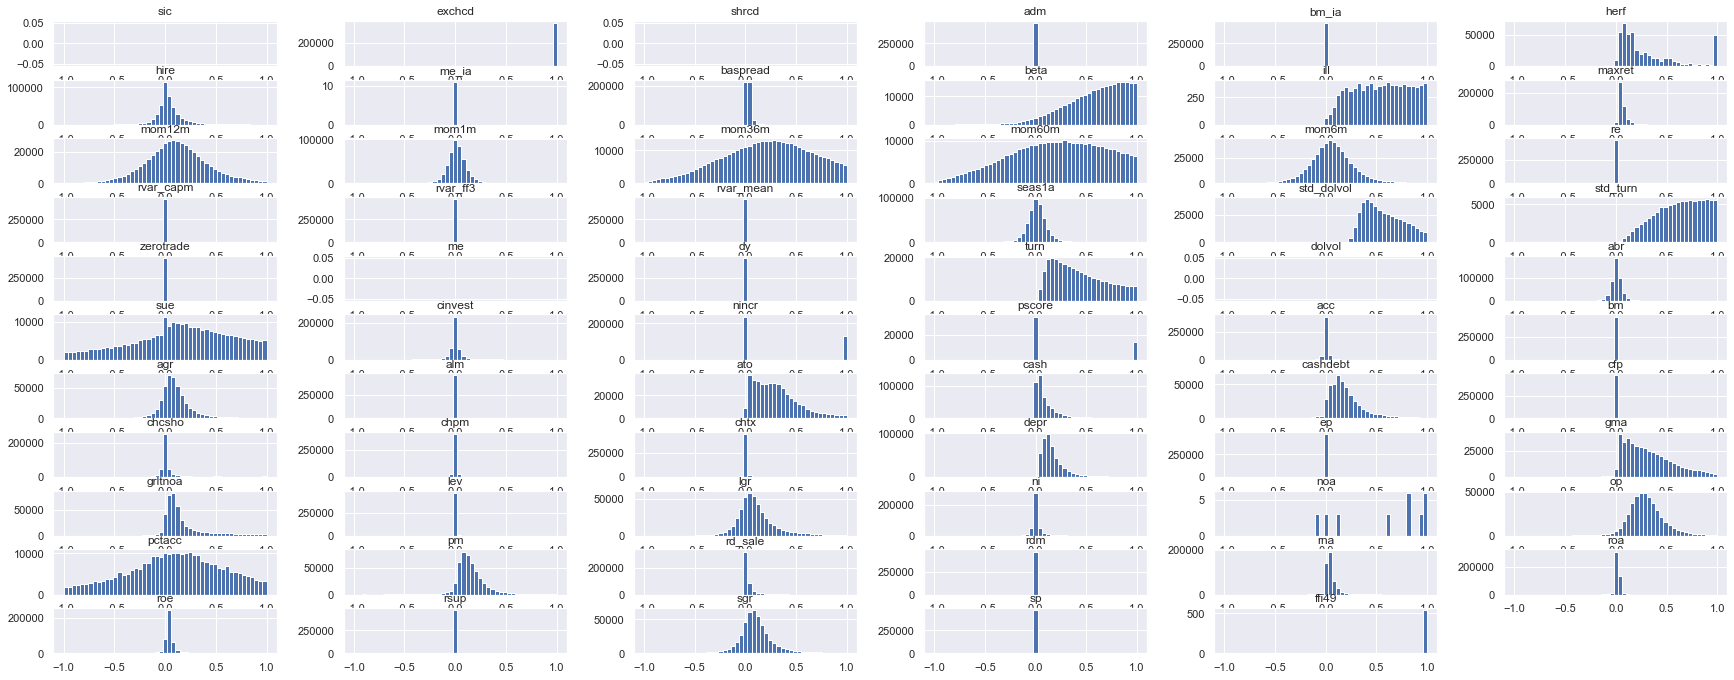

In [150]:
fig, ax = plt.subplots()
fig.set_figheight(30)
fig.set_figwidth(30)
total_df[features].hist(layout=(28, 6), bins=np.linspace(-1,1,50), ax=ax);

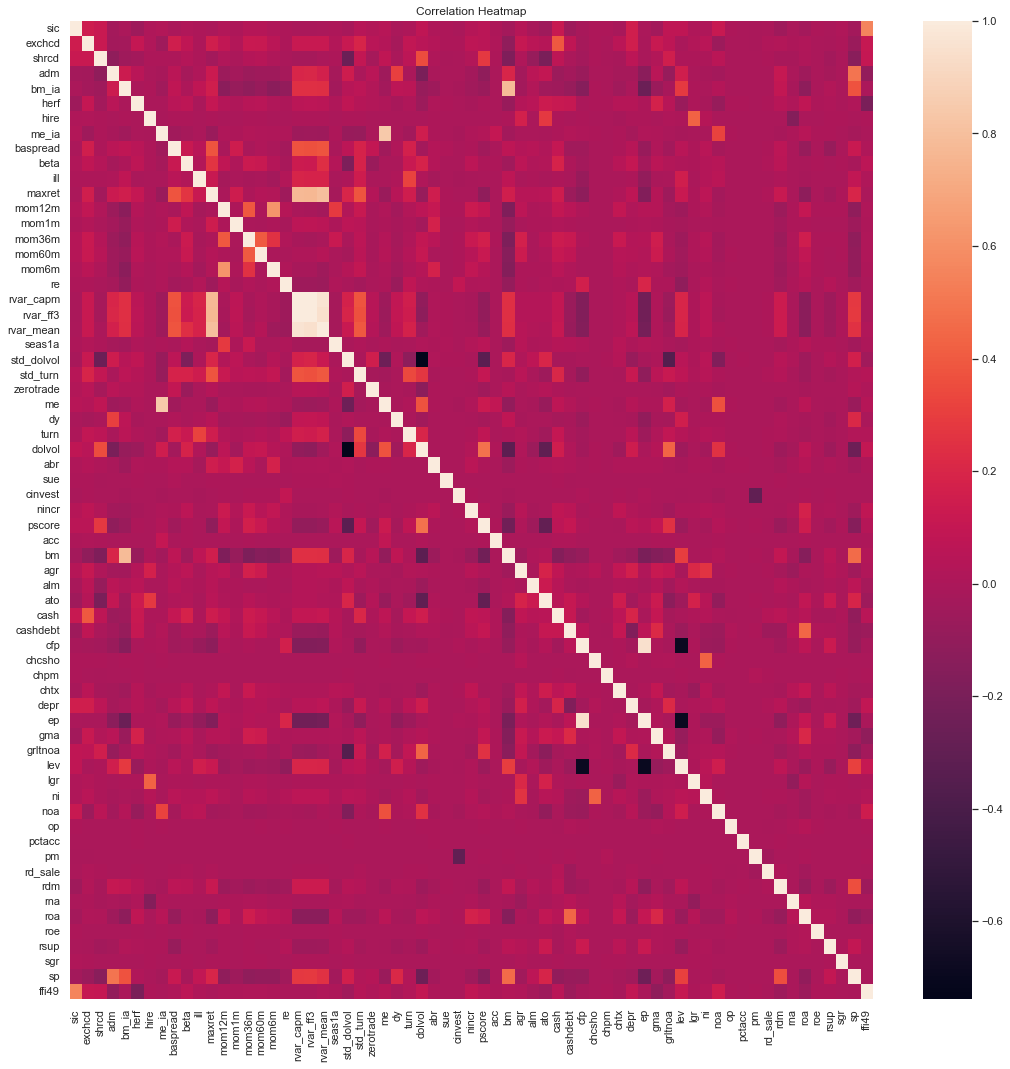

<Figure size 432x288 with 0 Axes>

In [151]:
plt.figure(figsize = (18,18))
sns.heatmap(data=total_df[features].corr())
plt.title('Correlation Heatmap')
plt.show()
plt.gcf().clear()

## normalization 

In [152]:
scaler = StandardScaler()
scaler.fit(total_df[features])
normalized = scaler.transform(total_df[features])
normalized_data = pd.DataFrame(normalized , columns=features)

print("The shape of normalised numerical data : " , normalized.shape)
normalized_data

The shape of normalised numerical data :  (471661, 65)


,sic,exchcd,shrcd,adm,bm_ia,...,roe,rsup,sgr,sp,ffi49
0,-0.372253,-0.5155,-3.212018,-0.264433,0.062066,...,0.006135,0.000710,-0.007838,-0.170716,-0.332488
1,-0.372253,-0.5155,-3.212018,-0.264697,0.057005,...,0.006135,0.000459,-0.007838,-0.171844,-0.332488
2,-0.372253,-0.5155,-3.212018,-0.263628,0.077547,...,0.006135,0.001479,-0.007838,-0.167263,-0.332488
3,-0.372253,-0.5155,-3.212018,-0.259533,0.156292,...,0.006135,0.005390,-0.007838,-0.149702,-0.332488
4,-0.372253,-0.5155,-3.212018,-0.261709,0.210067,...,0.005106,-0.055890,-0.008899,-0.131724,-0.332488
...,...,...,...,...,...,...,...,...,...,...,...
471656,1.056658,-0.5155,0.311331,-0.272274,-0.861245,...,0.002611,0.111124,-0.002432,-0.089758,1.240108
471657,1.056658,-0.5155,0.311331,-0.266373,-0.838082,...,0.002611,0.121030,-0.002432,-0.070574,1.240108
471658,1.056658,-0.5155,0.311331,-0.267532,-0.820092,...,0.002611,0.128724,-0.002432,-0.055674,1.240108
471659,1.056658,-0.5155,0.311331,-0.267906,-0.873336,...,0.003392,0.124913,0.000097,-0.067718,1.240108


In [153]:
normalized_data.describe()

,sic,exchcd,shrcd,adm,bm_ia,...,roe,rsup,sgr,sp,ffi49
count,4.716610e+05,4.716610e+05,4.716610e+05,4.716610e+05,4.716610e+05,...,4.716610e+05,4.716610e+05,4.716610e+05,4.716610e+05,4.716610e+05
mean,2.767611e-14,3.275976e-13,4.847169e-13,1.706247e-15,-3.810835e-16,...,3.738114e-17,6.685689e-17,1.007194e-16,-5.268963e-16,-3.244790e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.389114e+00,-5.155002e-01,-3.212018e+00,-3.189174e-01,-1.576994e+01,...,-3.954066e+02,-2.083127e+02,-8.813703e-01,-9.157645e+00,-2.129740e+00
25%,-8.328700e-01,-5.155002e-01,3.113308e-01,-2.658269e-01,-2.691122e-01,...,1.103017e-03,-5.021291e-02,-8.509184e-03,-3.064214e-01,-8.566866e-01
50%,-3.069247e-01,-5.155002e-01,3.113308e-01,-1.825796e-01,-4.734739e-02,...,2.293834e-03,-3.347247e-02,-6.668589e-03,-2.018210e-01,1.168250e-01
75%,8.556912e-01,-5.155002e-01,3.113308e-01,7.798455e-03,1.433120e-01,...,3.648624e-03,1.295671e-02,-4.311102e-03,1.806658e-02,9.405657e-01
max,3.090128e+00,2.009620e+00,3.113308e-01,1.860484e+02,1.699635e+02,...,1.172909e+01,1.422323e+02,3.443102e+02,1.690577e+02,1.464764e+00


## data split ??

In [102]:
train_end_list = pd.date_range('2020-01-01','2022-01-01',freq='m')

In [103]:
train_end_list

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [113]:
from tqdm import tqdm

In [130]:
for end_date in tqdm(train_end_list):
    valid_date = end_date + MonthBegin()

100%|████████████████████████████████████████| 24/24 [00:00<00:00, 36698.25it/s]


In [131]:
valid_date

Timestamp('2022-01-01 00:00:00', freq='M')

In [132]:
valid_date = valid_date.strftime('%Y%m%d')
valid_date

'20220101'

## Neural Network

In [ ]:
keras.backend.clear_session()

In [ ]:
#set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# build DNN model
def build_model(n_hidden=3, n_neurons= 30, input_shape=[4],learning_rate=3e-3, drop = 0.5):
    model = keras.models.Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape)) 
    for i in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons ,activation='relu'))
        model.add(Dropout(drop))
    model.add(keras.layers.Dense(4, activation="sigmoid"))
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics =['accuracy']) 
    return model

In [ ]:
# set callbacks rule
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

In [ ]:
# test DNN prediction accuray
keras_cl = keras.wrappers.scikit_learn.KerasClassifier(build_model)
keras_cl.fit(X_train, y_train, epochs=100,
              validation_data=(X_test, y_test),
              callbacks=callbacks,
              batch_size=16)

In [ ]:
# set parameters 
param_distribs = {
  "n_hidden": [1, 2, 3, 4],
  "n_neurons": np.arange(10, 60),
  "learning_rate": reciprocal(3e-4, 3e-2),
  'drop': uniform(0.2, 0.5)
}

In [ ]:
# parameters tuning 
rnd_search_cv = RandomizedSearchCV(keras_cl, param_distribs, n_iter=30, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=40, validation_data=(X_test, y_test),callbacks=callbacks, batch_size=16)

In [ ]:
# check best DNN parameters
rnd_search_cv.best_params_